importing Jupyter notebook from knn.ipynb
importing Jupyter notebook from naive_bayes.ipynb


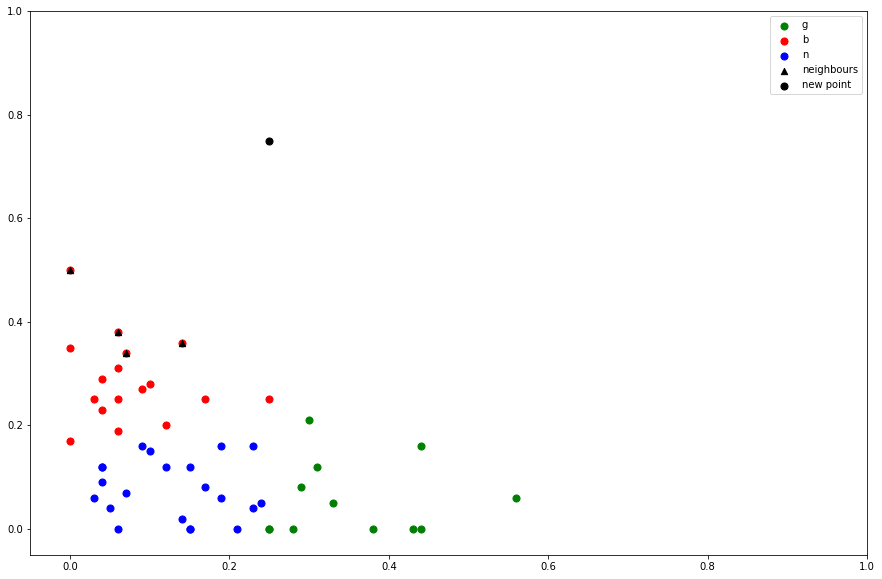

In [1]:
import import_ipynb
import word_score
from knn import *
from naive_bayes import *
analysis={}

In [2]:
import csv
data=[]

with open("test_set.csv") as csv_file:
        reader=csv.reader(csv_file,quotechar='"',delimiter=',',
                     quoting=csv.QUOTE_ALL, skipinitialspace=True)
        next(reader)
        for row in reader: 
            data.append(row)
            
data

[['1', 'It was somewhat good and bad', 'n'],
 ['2', 'it was good.', 'g'],
 ['3', 'It was not good.', 'b'],
 ['4', 'It was perfect.', 'g'],
 ['5', 'uncool', 'b'],
 ['6',
  'My concepts of the subject were solidified after taking this class.',
  'n'],
 ['7', 'Superb class, will help very much in my future work.', 'n'],
 ['8', 'Teacher teaches well, but needs to communicate better', 'n'],
 ['9',
  'Teacher is very lousy, doesn’t want to teach, doesn’t even show up to class most of the times.',
  'b'],
 ['10', 'Assignments are too tedious making the course very stressful.', 'b'],
 ['11', 'Very few classes, therefore syllabus was not covered properly.', 'n'],
 ['12',
  'Best class I’ve ever attended, teacher was very friendly and helpful. Overall excellent',
  'g'],
 ['13',
  'The assignments set by the teacher were very difficult and this decreased the class’s morale.',
  'n'],
 ['14',
  'Extremely difficult to focus in class, teacher makes everything boring and dull.',
  'b'],
 ['15',
  '

In [3]:
for row in data:
    print(row[0],word_score.get_tuple(row[1]))

1 (0.19, 0.25)
2 (0.62, 0.0)
3 (0.0, 0.42)
4 (0.38, 0.0)
5 (0.0, 0.88)
6 (0.17, 0.1)
7 (0.23, 0.02)
8 (0.33, 0.06)
9 (0.1, 0.22)
10 (0.1, 0.21)
11 (0.07, 0.09)
12 (0.28, 0.05)
13 (0.15, 0.19)
14 (0.06, 0.17)
15 (0.3, 0.0)
16 (0.14, 0.01)
17 (0.05, 0.19)
18 (0.23, 0.19)
19 (0.21, 0.02)
20 (0.27, 0.1)
21 (0.05, 0.17)
22 (0.11, 0.03)
23 (0.09, 0.22)
24 (0.22, 0.0)
25 (0.05, 0.06)


In [11]:
c_mat={}
def accuracy(c_mat):
    accuracy=0
    total=len(c_mat)
    
    for i in c_mat:
        #print(c_mat[i]['expected'],c_mat[i]['predicted'])
        if c_mat[i]['expected']==c_mat[i]['predicted']:
            accuracy+=1
    print(accuracy)
    return round(float(accuracy/total),2)

def recall(c_mat):
    recall=0
    recall_list=[]
    classes=set([row[2] for row in data[:size]])
    for c in classes:
        c_count=0
        tp_count=0
        for i in c_mat:
            if c_mat[i]['expected']==c:
                c_count+=1
                if c_mat[i]['expected']==c_mat[i]['predicted']:
                    tp_count+=1
        #print("recall for ",c," :",round(float(tp_count/c_count),2))
        if c_count>0:
            recall_list.append(round(float(tp_count/c_count),2))
    recall=round(float(sum(recall_list)/len(recall_list)),2)
    return recall

def precision(c_mat):
    precision=0
    precision_list=[]
    classes=set([row[2] for row in data[:size]])
    for c in classes:
        pred_count=0
        tp_count=0
        for i in c_mat:
            if c_mat[i]['predicted']==c:
                pred_count+=1
                if c_mat[i]['expected']==c_mat[i]['predicted']:
                    tp_count+=1
        #print("precision for ",c," :",round(float(tp_count/pred_count),2))
        if pred_count>0:
            precision_list.append(round(float(tp_count/pred_count),2))
    precision=round(float(sum(precision_list)/len(precision_list)),2)
    return precision
                
def analysis(algo):
    
    for row in data[:size]:
        
        key=int(row[0])
        c_mat[key]={'expected':row[2],'predicted':None}
        text=row[1]
        score=word_score.get_tuple(text)
        if algo=='knn':
            
            output=knn(4,score)
            
        elif algo=='nb':
            
            #print(score)
            output=nb(score)
            
        c_mat[key]['predicted']=output
    #print(c_mat)
    print("****",algo,"\naccuracy:",accuracy(c_mat),"\nrecall:",recall(c_mat),"\nprecision:",precision(c_mat))
    
    
    

In [21]:
import pprint
def get_cm(algo):
    cmat={'0':[0,0,0],'1':[0,0,0],'2':[0,0,0]}
    targets=['g','n','b']
    for row in data[:20]:
        
        #key=int(row[0])
        expected=row[2]
        key=str(targets.index(expected))
        #print(expected,key)
        #c_mat[key]={'expected':row[2],'predicted':None}
        text=row[1]
        score=word_score.get_tuple(text)
        if algo=='knn':
            
            output=knn(4,score)
            
        elif algo=='nb':
            
            #print(score)
            output=nb(score)
            
        predicted=output
        cmat[key][targets.index(predicted)]+=1
        #print(c_mat[key]['expected'],c_mat[key]['predicted'])
        
    #print(c,"\n",tp,"\t",fp,"\n",fn,"\t",tn,"\n")
    for i in cmat:
        print(cmat[i])
get_cm("knn")


[4, 3, 0]
[1, 5, 1]
[0, 1, 5]


In [6]:
for size in range(2,21,2):
    print(size)
    analysis('knn')
    analysis('nb')


2
**** knn 
accuracy: 0.7 
recall: 0.57 
precision: 0.66
**** nb 
accuracy: 0.75 
recall: 0.65 
precision: 0.68
4
**** knn 
accuracy: 0.7 
recall: 0.71 
precision: 0.72
**** nb 
accuracy: 0.75 
recall: 0.76 
precision: 0.78
6
**** knn 
accuracy: 0.7 
recall: 0.71 
precision: 0.72
**** nb 
accuracy: 0.75 
recall: 0.76 
precision: 0.78
8
**** knn 
accuracy: 0.7 
recall: 0.71 
precision: 0.72
**** nb 
accuracy: 0.75 
recall: 0.76 
precision: 0.78
10
**** knn 
accuracy: 0.7 
recall: 0.71 
precision: 0.72
**** nb 
accuracy: 0.75 
recall: 0.76 
precision: 0.78
12
**** knn 
accuracy: 0.75 
recall: 0.76 
precision: 0.76
**** nb 
accuracy: 0.75 
recall: 0.76 
precision: 0.78
14
**** knn 
accuracy: 0.7 
recall: 0.7 
precision: 0.73
**** nb 
accuracy: 0.75 
recall: 0.76 
precision: 0.78
16
**** knn 
accuracy: 0.7 
recall: 0.7 
precision: 0.73
**** nb 
accuracy: 0.75 
recall: 0.76 
precision: 0.78
18
**** knn 
accuracy: 0.7 
recall: 0.7 
precision: 0.73
**** nb 
accuracy: 0.75 
recall: 0.76 
preci

In [12]:
size=20
analysis("knn")

n b
g g
b b
g g
b b
n n
n n
n g
b b
b b
n n
g g
n n
b n
g g
n n
b b
g n
g n
g n
14
**** knn 
accuracy: 0.7 
recall: 0.7 
precision: 0.73


In [7]:
score=(0.21, 0.25)
print(knn(4,score),nb(score))

i: 0 value: [0.28, 0.42000000000000004] class: g hit: 6
i: 0 value: [0.28, 0.42000000000000004] class: n hit: 0
i: 0 value: [0.28, 0.42000000000000004] class: b hit: 0
i: 0 value: [0.14, 0.28] class: g hit: 2
i: 0 value: [0.14, 0.28] class: n hit: 11
i: 0 value: [0.14, 0.28] class: b hit: 3
i: 0 value: [0.42000000000000004, 0.56] class: g hit: 4
i: 0 value: [0.42000000000000004, 0.56] class: n hit: 0
i: 0 value: [0.42000000000000004, 0.56] class: b hit: 0
i: 0 value: [0.0, 0.14] class: g hit: 0
i: 0 value: [0.0, 0.14] class: n hit: 10
i: 0 value: [0.0, 0.14] class: b hit: 14
i: 1 value: [0.0, 0.125] class: g hit: 10
i: 1 value: [0.0, 0.125] class: n hit: 17
i: 1 value: [0.0, 0.125] class: b hit: 0
i: 1 value: [0.125, 0.25] class: g hit: 2
i: 1 value: [0.125, 0.25] class: n hit: 4
i: 1 value: [0.125, 0.25] class: b hit: 4
i: 1 value: [0.25, 0.375] class: g hit: 0
i: 1 value: [0.25, 0.375] class: n hit: 0
i: 1 value: [0.25, 0.375] class: b hit: 11
i: 1 value: [0.375, 0.5] class: g hit: 0

In [8]:
word_score.get_tuple("It was good and bad")

(0.21, 0.25)